## Evaluation of STT models

Load the benchmark dataset from huggingface

In [ ]:
! pip install datasets transformers pandas torch
! pip install ipywidgets
! pip install tqdm

In [1]:
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("openpecha/tibetan-voice-benchmark")
df = pd.DataFrame(dataset['test'])

In [2]:
pd.options.mode.chained_assignment = None
df['path'] = df['file_name'].apply(lambda x: f'/media/monlamai/SSD/wav2vec2/segments/{x.replace(".wav","").replace(".mp3","")}.wav')

In [3]:
df.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len,path
0,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,rgan rabs la gus zhabs che zhing /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,27,1.401,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...
1,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,rgyu mtshan shin tu mang po yod de/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,30,1.485,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...
2,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,de ltar yongs grags byas nas gsungs pa'i theg ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,65,5.989,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...
3,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,1.809,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...
4,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,mi tshangs par spyod do zhes pa lta bu dmigs k...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,61,4.914,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...


In [4]:
df.shape

(5367, 9)

In [7]:
i = 124
df.loc[i, 'path'], df.loc[i, 'uni']

('/media/monlamai/SSD/wav2vec2/segments/STT_AB00172_2352_8324991_to_8328011.wav',
 'སྤྲིན་དཀར་ནག་གཉིས་ཀས་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང༌། ')

### An Example inference from different models

In [ ]:
! pip install pyewts

! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [9]:
from transformers import pipeline
import pyewts
converter = pyewts.pyewts()

print("audio path", df.loc[i, 'path'])

print("ground truth", df.loc[i, 'uni'])

generator = pipeline(model="openpecha/wav2vec2_run8")
opt = generator(df.loc[i, 'path'])
inf = opt['text']
print("openpecha/wav2vec2_run8", inf)

generator = pipeline(model="TenzinGayche/whisper-small-3")
opt = generator(df.loc[i, 'path'])
inf = opt['text']
print("TenzinGayche/whisper-small-3", converter.toUnicode(inf))

generator = pipeline(model="spsither/whipser-small-r3-aug")
opt = generator(df.loc[i, 'path'])
inf = opt['text']
print("spsither/whipser-small-r3-aug", converter.toUnicode(inf))

generator = pipeline(model="spsither/whipser-small-r3-aug-length-penalty_n1")
opt = generator(df.loc[i, 'path'])
inf = opt['text']
print("spsither/whipser-small-r3-aug-length-penalty_n1", converter.toUnicode(inf))


audio path /media/monlamai/SSD/wav2vec2/segments/STT_AB00172_2352_8324991_to_8328011.wav
ground truth སྤྲིན་དཀར་ནག་གཉིས་ཀས་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང༌། 


Some weights of the model checkpoint at openpecha/wav2vec2_run8 were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at openpecha/wav2vec2_run8 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a dow

Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize
openpecha/wav2vec2_run8 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབ་པ་དང་།


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


TenzinGayche/whisper-small-3 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབ་པ་དང་


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


spsither/whipser-small-r3-aug སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང་༎དཀར་གནག་གསུམ་གྱི་ནང་མཐུན་པའམ༎དང་པོའོ༎བདག་ནི་དགར་གནང་བདག་གི་བསམ་པར་བགྱིད༎རྒྱལ་བའང་དགའ་བཞིན་དུ༎སྡུག་བདེན་དཀའ་རྩེ་ལ༎བསྒུལ་དུ་བཞུགས༎དེ་བཏང་བ་དང་བདེ་བ་བསྟེན༎བྱས་པ་དཀོན་མཆོག་གི༎ཡུལ་ལ་དམིགས་པ་བསྐང་བར༎མཛད་དུ་དཀྲོགས༎


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


spsither/whipser-small-r3-aug-length-penalty_n1 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང་དང་བ་དང་བཞིན་གཤེགས་པ་བསྟེན་ཚུལ་ལ་སོགས་དབང་པོའམ་བསྟུན་ཐམས་ཅད་མཐར་ཕྱིན་ཏེ༎དཀའ་རྩེབ་པའང་བདུད་དང་རྣམས་སུ་བཞུགས་པར་བགྱི༎རྒྱན་གས་བཏང་བའོ༎


### Inference on all the benchmark data with the latest model

In [10]:
from tqdm.auto import tqdm
from transformers import pipeline

generator = pipeline(model="spsither/wav2vec2_run9.15")

predictions = []

for path in tqdm(df['path']):
    opt = generator(path)
    predictions.append(opt["text"])

df['inf'] = predictions

Some weights of the model checkpoint at spsither/wav2vec2_run9.15 were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at spsither/wav2vec2_run9.15 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a

  0%|          | 0/5367 [00:00<?, ?it/s]

In [11]:
df.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len,path,inf
0,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,rgan rabs la gus zhabs che zhing /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,27,1.401,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...,རྒན་རབ་ལ་གུས་ཞབས་ཆེ་བཞིང་།
1,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,rgyu mtshan shin tu mang po yod de/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,30,1.485,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།
2,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,de ltar yongs grags byas nas gsungs pa'i theg ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,65,5.989,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་རྣམས...
3,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,1.809,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...,བ་ཕྱུག་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོལ་ནས།
4,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,mi tshangs par spyod do zhes pa lta bu dmigs k...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,61,4.914,/media/monlamai/SSD/wav2vec2/segments/STT_AB00...,མི་ཚང་པར་དཔྱོད་དོ། ཞེས་པ་ལྟ་བུ་མིག་གི་ཕྱེ་ནས་བ...


In [ ]:
# import pyewts

# converter = pyewts.pyewts()

# def toUnicode(text):
#     if type(text) == float:
#         return None
#     return converter.toUnicode(text)

# df['inf'] = df['inf'].map(lambda x : toUnicode(x))

In [12]:
from evaluate import load

cer_metric = load("cer")

In [13]:
rand_index = 0
print(df.loc[rand_index, 'uni'])
print(df.loc[rand_index, 'inf'])
cer = cer_metric.compute(references=[df.loc[rand_index, 'uni']], predictions=[df.loc[rand_index, 'inf']])

print(cer)

རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་། 
རྒན་རབ་ལ་གུས་ཞབས་ཆེ་བཞིང་།
0.07692307692307693


In [14]:
def calculate_cer(row):
    try:
        uni = row['uni']
        inf_uni = row['inf']
        cer = cer_metric.compute(references=[uni], predictions=[inf_uni])
        cer = min(cer, 1.0)
        return cer
    except:
        return 0.0

In [15]:
df['cer'] = df.apply(lambda row: calculate_cer(row), axis=1)

In [16]:
df['inf'].str.len().describe()

count    5367.000000
mean       43.645053
std        19.121835
min         1.000000
25%        28.000000
50%        42.000000
75%        58.000000
max       222.000000
Name: inf, dtype: float64

### The Average CER

In [17]:
df['cer'].mean()

0.25947702126182826

### Department wise CER

In [18]:
df[['dept', 'cer']].groupby('dept').mean('cer')

,cer
dept,
STT_AB,0.079390
STT_CS,0.398072
STT_MV,0.384694
STT_NS,0.253226
STT_TT,0.131139


### If we take out MV

In [19]:
df[df['dept'] != 'STT_MV']['cer'].mean()

0.23080347193962011

### Breakdown of CS

https://github.com/MonlamAI/STT-template/blob/main/README.md

In [20]:
df_cs = df[df['dept'] == 'STT_CS']

In [21]:
file_name_correction = {
    "STT_CS-2013-P-D-B08-5-R-01_0007_44457_to_50532" : "STT_CS-D-2013-P-D-B08-5-R-01_0007_44457_to_50532",
    "STT_CS-2013-P-D-B08-5-R-01_0042_289920_to_291996" : "STT_CS-D-2013-P-D-B08-5-R-01_0042_289920_to_291996",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0098_1365972_to_1368722" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0098_1365972_to_1368722",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0134_1844125_to_1849525" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0134_1844125_to_1849525",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0118_892189_to_899277" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0118_892189_to_899277",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0009_207925_to_212009" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0009_207925_to_212009",
    "STT_CS-2013-P-D-B08-5-R-01_0074_513894_to_519842" : "STT_CS-D-2013-P-D-B08-5-R-01_0074_513894_to_519842",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0012_92112_to_100229" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0012_92112_to_100229",
    "STT_CS-2013-P-D-B08-5-R-01_0075_519910_to_529146" : "STT_CS-D-2013-P-D-B08-5-R-01_0075_519910_to_529146",
    "STT_CS-D-2014-MD-B02-3-R-04_0059_500764_to_510674" : "STT_CS-D-2014-M-D-B02-3-R-04_0059_500764_to_510674",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0051_386910_to_393921" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0051_386910_to_393921",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0076_1108999_to_1111919" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0076_1108999_to_1111919",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0094_724975_to_731404" : "STT_CS-X-2015-M-D-B03-3-R-01_0094_724975_to_731404",
    "STT_CS-D-2014-MD-B02-3-R-04_0025_206226_to_215603" : "STT_CS-D-2014-M-D-B02-3-R-04_0025_206226_to_215603",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0061_473520_to_476322" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0061_473520_to_476322",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0117_885102_to_892189" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0117_885102_to_892189",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0090_1032201_to_1039246" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0090_1032201_to_1039246",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0125_943962_to_950205" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0125_943962_to_950205",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0043_757282_to_762302" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0043_757282_to_762302",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0027_552377_to_557575" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0027_552377_to_557575",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0063_1041634_to_1050072" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0063_1041634_to_1050072",
    "STT_CS-2013-P-D-B08-5-R-01_0012_79320_to_88112" : "STT_CS-D-2013-P-D-B08-5-R-01_0012_79320_to_88112",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0053_717449_to_724502" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0053_717449_to_724502",
    "STT_CS-2013-P-D-B08-5-R-01_0086_624434_to_631074" : "STT_CS-D-2013-P-D-B08-5-R-01_0086_624434_to_631074",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0051_541122_to_543299" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0051_541122_to_543299",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0144_2043840_to_2049342" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0144_2043840_to_2049342",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0076_891801_to_895260" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0076_891801_to_895260",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0038_295557_to_300315" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0038_295557_to_300315",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0179_1424477_to_1431590" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0179_1424477_to_1431590",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0091_686356_to_692119" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0091_686356_to_692119",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0065_1056704_to_1060264" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0065_1056704_to_1060264",
    "STT_CS-D-2014-MD-B02-3-R-04_0060_510674_to_520585" : "STT_CS-D-2014-M-D-B02-3-R-04_0060_510674_to_520585",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0031_347954_to_354265" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0031_347954_to_354265",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0086_1255457_to_1262595" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0086_1255457_to_1262595",
    "STT_CS-D-2014-MD-B02-3-R-04_0011_86838_to_96195" : "STT_CS-D-2014-M-D-B02-3-R-04_0011_86838_to_96195",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0023_236545_to_240240" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0023_236545_to_240240",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01e_0029_511827_to_513902" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01e_0029_511827_to_513902",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0120_910950_to_918615" : "STT_CS-X-2015-M-D-B03-3-R-01_0120_910950_to_918615",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0112_857958_to_863130" : "STT_CS-X-2015-M-D-B03-3-R-01_0112_857958_to_863130",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0016_180233_to_182865" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0016_180233_to_182865",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0044_649881_to_653138" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0044_649881_to_653138",
    "STT_CS-D-2014-MD-B02-3-R-04_0094_807696_to_817534" : "STT_CS-D-2014-M-D-B02-3-R-04_0094_807696_to_817534",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0104_1419330_to_1421777" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0104_1419330_to_1421777",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0129_1798326_to_1801954" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0129_1798326_to_1801954",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0007_51274_to_53738" : "STT_CS-X-2015-M-D-B03-3-R-01_0007_51274_to_53738",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01d_0011_139277_to_141741" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01d_0011_139277_to_141741",
    "STT_CS-2013-P-D-B08-5-R-01_0091_661812_to_670367" : "STT_CS-D-2013-P-D-B08-5-R-01_0091_661812_to_670367"
}

In [22]:
def parse_cs_file_name(code):
    
    try:
        if code in file_name_correction:
            code = file_name_correction[code]
        # Split the code into parts
        parts = code.split('-')

        # Decode each part of the code
        
        data_type = {'X': 'non-designated', 'D': 'story-telling', 'L':'conversation'}.get(parts[1], 'Unknown')
        birth_year = parts[2][:4]
        gender = {'P': 'male', 'M': 'female', 'X': 'other'}.get(parts[3][:1], 'Unknown')
        location = {'D': 'Dharamsala', 'S': 'South India', 'L': 'Ladakh', 'N': 'Nepal'}.get(parts[4][:1], 'Unknown')
        education_type = parts[5][0]
        education_years = parts[5][1:3]
        grade_level = parts[6][:1]
        school_code = parts[7][:1]

        # Create a dictionary with the decoded values
        decoded = {
            'data_type': data_type,
            'birth_year': int(birth_year),
            'age': 2023 - int(birth_year),
            'gender': gender,
            'location': location,
            'education_type': education_type,
            'education_years': int(education_years),
            'grade_level': int(grade_level),
            'school_code': school_code
        }
    except:
        print(f'Error decoding {code}')
        return {}
    return decoded

# Example usage
codes = [
    'STT_CS-D-2016-M-D-B04-1-R-06_0017_147090_to_156979',
    'STT_CS-X-2014-M-D-B02-4-R-01_0110_1035711_to_1037787',
    'STT_CS-L-2014/2014-P/P-D/D-B03/B06-5/5-R/R-01_0129_1106637_to_1112914.mp3',
]

for code in codes:
    print(parse_cs_file_name(code))


{'data_type': 'story-telling', 'birth_year': 2016, 'age': 7, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 4, 'grade_level': 1, 'school_code': 'R'}
{'data_type': 'non-designated', 'birth_year': 2014, 'age': 9, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 2, 'grade_level': 4, 'school_code': 'R'}
{'data_type': 'conversation', 'birth_year': 2014, 'age': 9, 'gender': 'male', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 3, 'grade_level': 5, 'school_code': 'R'}


In [23]:
df_parsed = df_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
df_cs = pd.concat([df_cs, df_parsed], axis=1)

In [24]:
df_cs.columns

Index(['file_name', 'uni', 'wylie', 'url', 'dept', 'grade', 'char_len',
       'audio_len', 'path', 'inf', 'cer', 'data_type', 'birth_year', 'age',
       'gender', 'location', 'education_type', 'education_years',
       'grade_level', 'school_code'],
      dtype='object')

### Age

Text(0.5, 1.0, 'CER by Age')

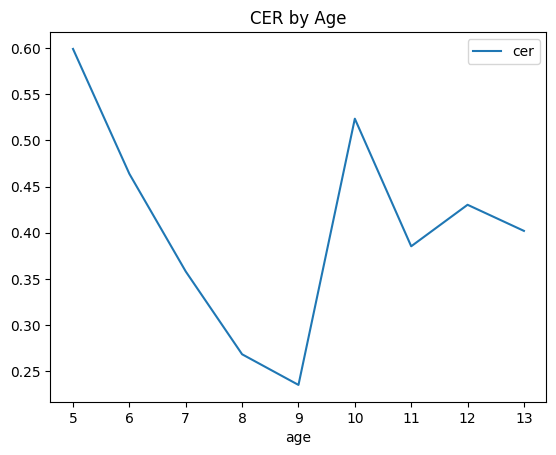

In [41]:
df_cs[['age', 'cer']].groupby('age').mean('cer').plot().set_title('CER by Age')

Text(0.5, 1.0, 'Number of files per Age')

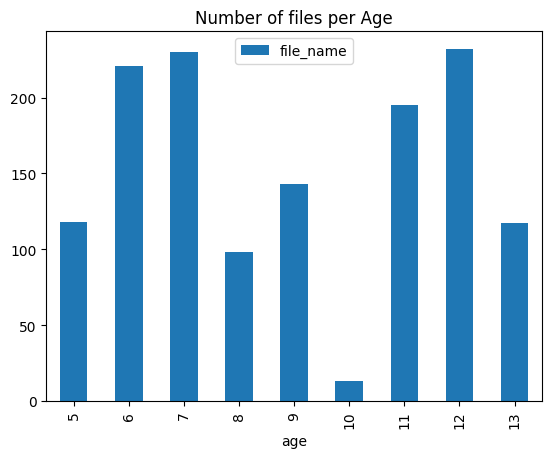

In [44]:
df_cs[['age', 'file_name']].groupby('age').count().plot.bar().set_title('Number of files per Age')

### Gender

Text(0.5, 1.0, 'CER by gender')

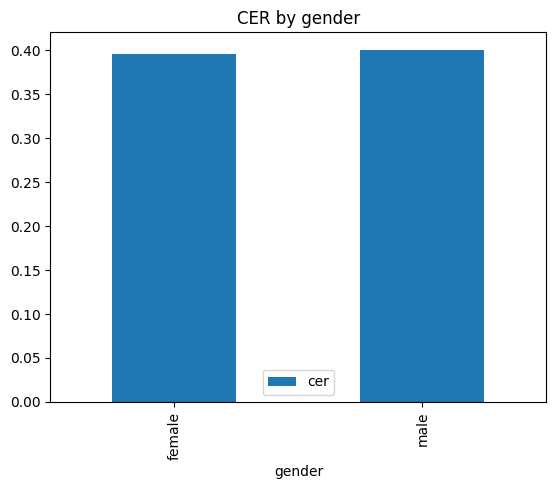

In [45]:
df_cs[['gender', 'cer']].groupby('gender').mean('cer').plot.bar().set_title('CER by gender')

### Grade Level

Text(0.5, 1.0, 'Number of files per grade level')

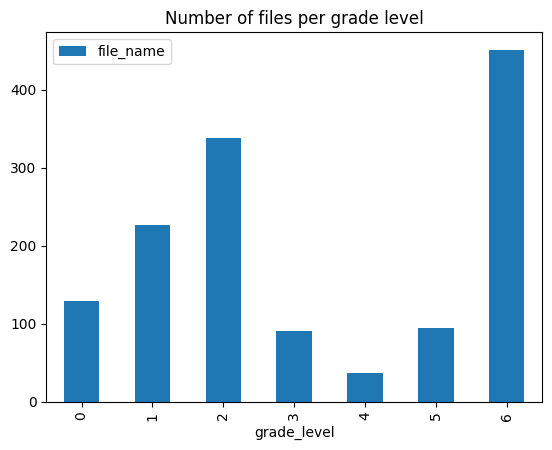

In [40]:
df_cs[['grade_level', 'file_name']].groupby('grade_level').count().plot.bar().set_title('Number of files per grade level')

Text(0.5, 1.0, 'CER by grade level')

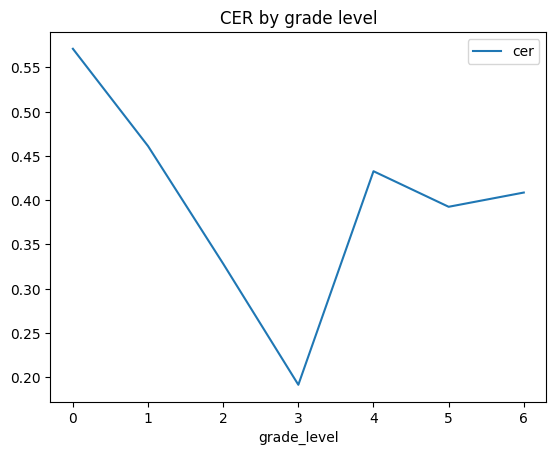

In [46]:
df_cs[['grade_level', 'cer']].groupby('grade_level').mean('cer').plot().set_title('CER by grade level')

### School Code
School Code is which school the subject's data was collected from
* R = རྡ་སྟེང་བོད་ཁྱིམ་སློབ་གྲྭ
* B = བོད་ཁྱིམ་ཉིན་མོའི་སློབ་གྲྭ
* D = དྷ་ཤོད་བོད་ཁྱིམ་སློབ་གྲྭ
* Y = ཡོངས་གླིང་སློབ་གྲྭ
* P = སྤོན་ཊ་སློབ་གྲྭ
* S = ཤེས་རབ་དགའ་ཚལ་སློབ་གླིང་།
* M = མན་ཇུ་ཤི་རི།
* G = གོ་པལ་པུར་སློབ་གྲྭ
* T = སམ་བྷོ་ཊ་སློབ་གྲྭ
* Z = སུ་ཇཱ་སློབ་གྲྭ
* C = ཅོན་ཏ་ར་བོད་ཁྱིམ་སློབ་གྲྭ
* K = རྒྱུད་སྟོད་གྲྭ་ཚང་།
* N = རྣམ་རྒྱལ་གྲྭ་ཚང་།
* A = ཤུག་གསེབ་ཨ་ནེའི་དགོན་པ།
* L = དགེ་ལྡན་ཆོས་གླིང་།
* X = མེད་པ།

Text(0.5, 1.0, 'CER by school code')

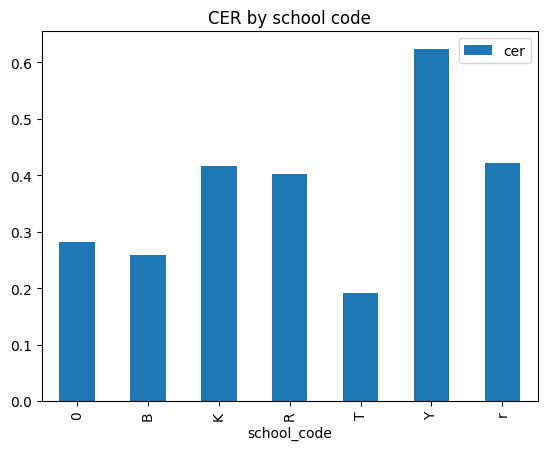

In [47]:
df_cs[['school_code', 'cer']].groupby('school_code').mean('cer').plot.bar().set_title('CER by school code')

Text(0.5, 1.0, 'Number of files per school code')

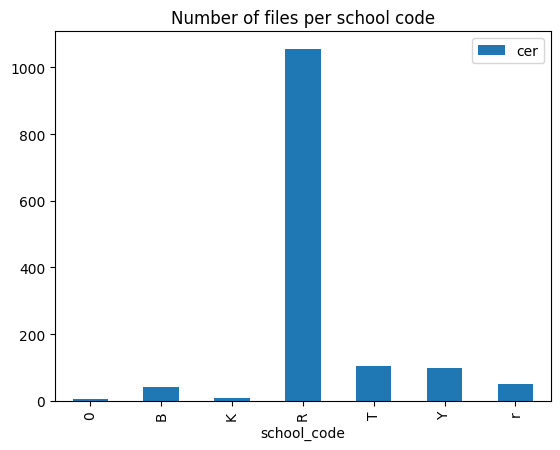

In [48]:
df_cs[['school_code', 'cer']].groupby('school_code').count().plot.bar().set_title('Number of files per school code')

### Education Years

Text(0.5, 1.0, 'Number of files per education years')

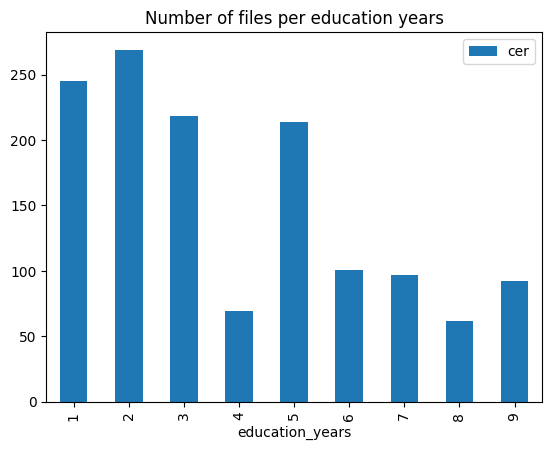

In [50]:
df_cs[['education_years', 'cer']].groupby('education_years').count().plot.bar().set_title('Number of files per education years')

Text(0.5, 1.0, 'CER by education years')

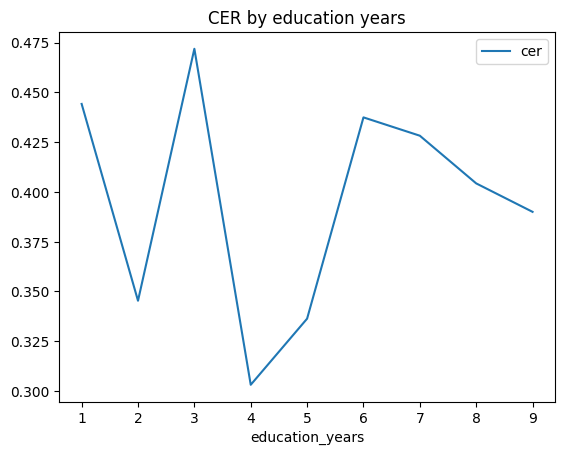

In [51]:
df_cs[['education_years', 'cer']].groupby('education_years').mean('cer').plot().set_title('CER by education years')

### Education Type

Text(0.5, 1.0, 'CER by education type')

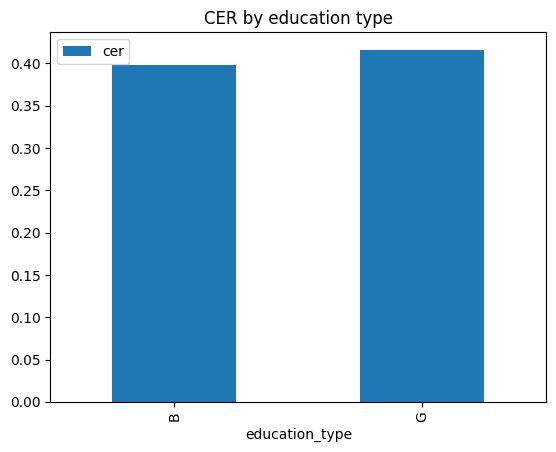

In [53]:
df_cs[['education_type', 'cer']].groupby('education_type').mean('cer').plot.bar().set_title('CER by education type')

Text(0.5, 1.0, 'Number of files per education type')

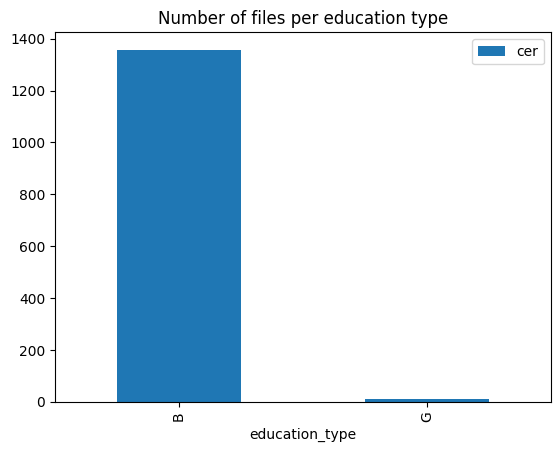

In [55]:
df_cs[['education_type', 'cer']].groupby('education_type').count().plot.bar().set_title('Number of files per education type')

In [ ]:
from transformers import pipeline
import gradio as gr

pipe = pipeline(model="spsither/whipser-small-r3-aug-length-penalty_n1")  # change to "your-username/the-name-you-picked"

def transcribe(audio):
    text = pipe(audio)["text"]
    return text

iface = gr.Interface(
    fn=transcribe,
    inputs=gr.Audio(source="microphone", type="filepath"),
    outputs="text",
    title="Whisper Large Tibetan",
    description="Realtime demo for Tibetan speech recognition using a fine-tuned Whisper medium model.",
)

iface.launch()

### Analyse more in stt.pecha.tools

In [ ]:
df_cs['transcript'] = df_cs['inf']
df_cs['reviewed_transcript'] = df_cs['uni']
df_cs['inference_transcript'] = ''
df_cs['group_id'] = 1
df_cs['state'] = "accepted"
df_cs['audio_duration'] = df_cs['cer']
df_cs['transcriber_id'] = 1
df_cs['reviewer_id'] = 2
df_cs['final_reviewer_id'] = 3


In [ ]:
df_cs[df_cs['cer'] > 0.9].shape

In [ ]:
# df[df['cer'] > 0.9][['url', 'uni', 'inf', 'cer']].to_csv('cer-0.9.tsv', sep='\t', index=False)

df_cs[df_cs['cer'] > 0.9][['file_name','url','inference_transcript','transcript','reviewed_transcript','audio_duration','group_id','state','transcriber_id','reviewer_id','final_reviewer_id']].to_csv('cer-0.9.csv')

In [ ]:
df_cs[df_cs['cer'] > 0.8]['file_name'].to_csv('cer-0.9.txt', index=False)

In [ ]:
df_cs[df_cs['cer'] > 0.8][['file_name','url','transcript','reviewed_transcript']].to_csv('cer-0.9.csv')

In [ ]:
df_cs[df_cs['cer'] < 0.1][['url', 'uni', 'inf', 'cer']].to_csv('cer-0.1.tsv', sep='\t', index=False)

In [ ]:
df_cs[df_cs['file_name'].isin([
    'STT_TT00144_01232.950-01234.050',
    
    'STT_CS-D-2014-M-D-B01-3-R-03_0019_136172_to_139547',
    'STT_CS-L-2017_2017-P_P-D_D-B01_B01-1_1-R_R-03_0139_1611503_to_1621020',
    'STT_CS-D-2012-P-D-B04-5-R-01_0086_736163_to_745697',
    
    'STT_AB00233_0315_3763228_to_3772352',
    'STT_AB00250_0191_1536177_to_1548643',
    'STT_AB00255_0197_1588506_to_1600406'
    
    'STT_MV0081_0176_1408521_to_1412238',
    'STT_MV0008_0130_957881_to_967209',
])]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/byt5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/byt5-base")

input_ids_prompt = "ཞུ་དག་བཏང་བྱས་བསམ་བློ་བཏང་ཡ་དེ་དཔེ་གལ་ཆེན་པོ་རེད།"

# input_ids_prompt = "The dog chases a ball in the park."
input_ids = tokenizer(input_ids_prompt).input_ids

# Note that we cannot add "{extra_id_...}" to the string directly
# as the Byte tokenizer would incorrectly merge the tokens
# For ByT5, we need to work directly on the character level
# Contrary to T5, ByT5 does not use sentinel tokens for masking, but instead
# uses final utf character ids.
# UTF-8 is represented by 8 bits and ByT5 has 3 special tokens.
# => There are 2**8+2 = 259 input ids and mask tokens count down from index 258.
# => mask to "The dog [258]a ball [257]park."

print(len(input_ids), len(input_ids_prompt))
# print([input_ids[:8] + [258] + input_ids[14:]])

print(input_ids_prompt)

start = 56
end = start + 10

print(tokenizer.batch_decode([input_ids[:start] + [258] + input_ids[end:] ])[0])
input_ids = torch.tensor([input_ids[:start] + [258] + input_ids[end:] ])


# ByT5 produces only one char at a time so we need to produce many more output characters here -> set `max_length=100`.
output_ids = model.generate(input_ids, max_length=100)[0].tolist()
# print(output_ids)

# ^- Note how 258 descends to 257, 256, 255

# Now we need to split on the sentinel tokens, let's write a short loop for this
output_ids_list = []
start_token = 0
sentinel_token = 258
while sentinel_token in output_ids:
    split_idx = output_ids.index(sentinel_token)
    output_ids_list.append(output_ids[start_token:split_idx])
    start_token = split_idx
    sentinel_token -= 1

output_ids_list.append(output_ids[start_token:])
output_string = tokenizer.batch_decode(output_ids_list)
output_string

In [ ]:
len("ཞུ་")
test = "ཞུ་"
len(tokenizer(test).input_ids)

In [ ]:
STT_AB00233_0315_3763228_to_3772352"30097,,https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00233_0315_3763228_to_3772352.wav,,ན་ཏེ། སྤྱིར་ཁྲི་སྲོང་ལྟ་བུ་མངའ་ཐང་འདི་དུས་ལས་རྒྱ་ཆེ་ཡང་གདུང་རྒྱུད་གོང་མ་རྣམས་ཀྱིས་དབང་བའི་ཆབ་སྲིད་ཆེན་པོ་སྔར་ཡོད་ཀྱི་སྟེང་དུ། དཔུང་སྟོབས་ལྷག་པར་དར་བ་ཙམ་ཡིན་ལ། རྒྱལ་པོ་འདི་ནི་ཐོག་མར་ཡུལ་ཕྲན་འགའ་ཞིག་གི་བདག་པོ་ཙམ་དུ་བཞུགས་པ་ལས། ཡུན་ཐུང་ངུ་དེ་ཙམ་ཞིག་གི་རིང་ལ། ལེ་བར་ཁྲི་ཕྲག་དུ་མས་འཁྱུད་པའི་སའི་ཁྱོན་ལ་མངའ་མཛད་པའི་ཕྱིར་རོ།།ཐེ་ཙུང་ནི་ཐང་གུར་གྱི་གོང་མའི་ཁྲོད་ན་སྟོབས་ཤུགས་ཀྱི་གྲགས་སྙན་ཅན་ཡིན་མོད་ཀྱི། དེ་ཡང་དོན་ལ་བོད་ཀྱི་དཔུང་གི་རྔམས་ཟིལ་མ་བཟོད་པའི་ཁར། སྔར་སྲས་མོ་མི་སྟེར་བའི་ཁ་ཆད་བྱས་པ་ལ་བརྩིས་ཏེ། རེ་ཞིག་འཐབ་པའི་ཁུལ་དུ་བྱས་ཤིང་། བོད་དམག་ལ་ཉམ་ཉེས་པ་ཅུང་ཟད་བྱུང་བའི་མཇུག་ཏུ། ཀོང་ཇོ་ཡང་དེ་མ་ཐག་གནང་བ་ཡིན་ནོ་ཞེས་མཁས་པ་འགའ་ཞིག་གིས་ཟེར་ཏེ། ཤིན་ཏུ་བདེན་པར་འཁུམས་ཤིང་། ཐེ་ཙུང་ནས་བཟུང་རྒྱའི་མཁར་མིག་སུམ་བརྒྱ་ཙམ་བོད་ཀྱི་ལག་ཏུ་ཤོར་ཞེས་ཟེར་རོ། གཡོ་མེད་སྙིང་རྗེའི་དབང་ཕྱུག་སྤྱན་རས་གཟིགས།། ཡུད་ཙམ་ཁྲོས་པའི་སྤྱན་གྱི་སྡང་མིག་གིས།། གསེར་འབྲུག་སྡེར་ལྔའི་ཁྲི་ལ་འགྱིངས་པ་ཡི།། མཐུ་ལྡན་གནམ་གྱི་བུ་ཡང་འདར་བར་བྱས།། ཞེས་བྱ་བ་ནི་རྒྱལ་པོ་སྲོང་བཙན་སྒམ་པོའི་སྐབས་སོ། སྲོང་ ,པའི་ཆེད་དུ་གོང་ནས་དམག་བྟོན་མཛེངས་ཞན་ཐད་མཐུ་དགོང་རྩའ་ཡུན་གཉིས།ལན་འབྱོར་དང་ཧྲང་སྦྱོར་དང་། པུ་ཏིང་ཁེམ་ལ་དམག་དཔོན་,0,1,accepted,1,1,2"